In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [5]:
# Set the style for our plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

In [50]:
# We'll use the California Housing dataset which is built into scikit-learn
housing = "California_Housing.csv.htm"

print("Dataset shape:", data.shape)
print("\nFeatures:")

print("\nTarget: PRICE (in $100,000s)")

# Display the first 5 rows of the dataset
print("\nFirst 5 rows of the dataset:")
data.head()

Dataset shape: (20640, 9)

Features:

Target: PRICE (in $100,000s)

First 5 rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
data.describe()

Missing values in each column:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

Summary statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


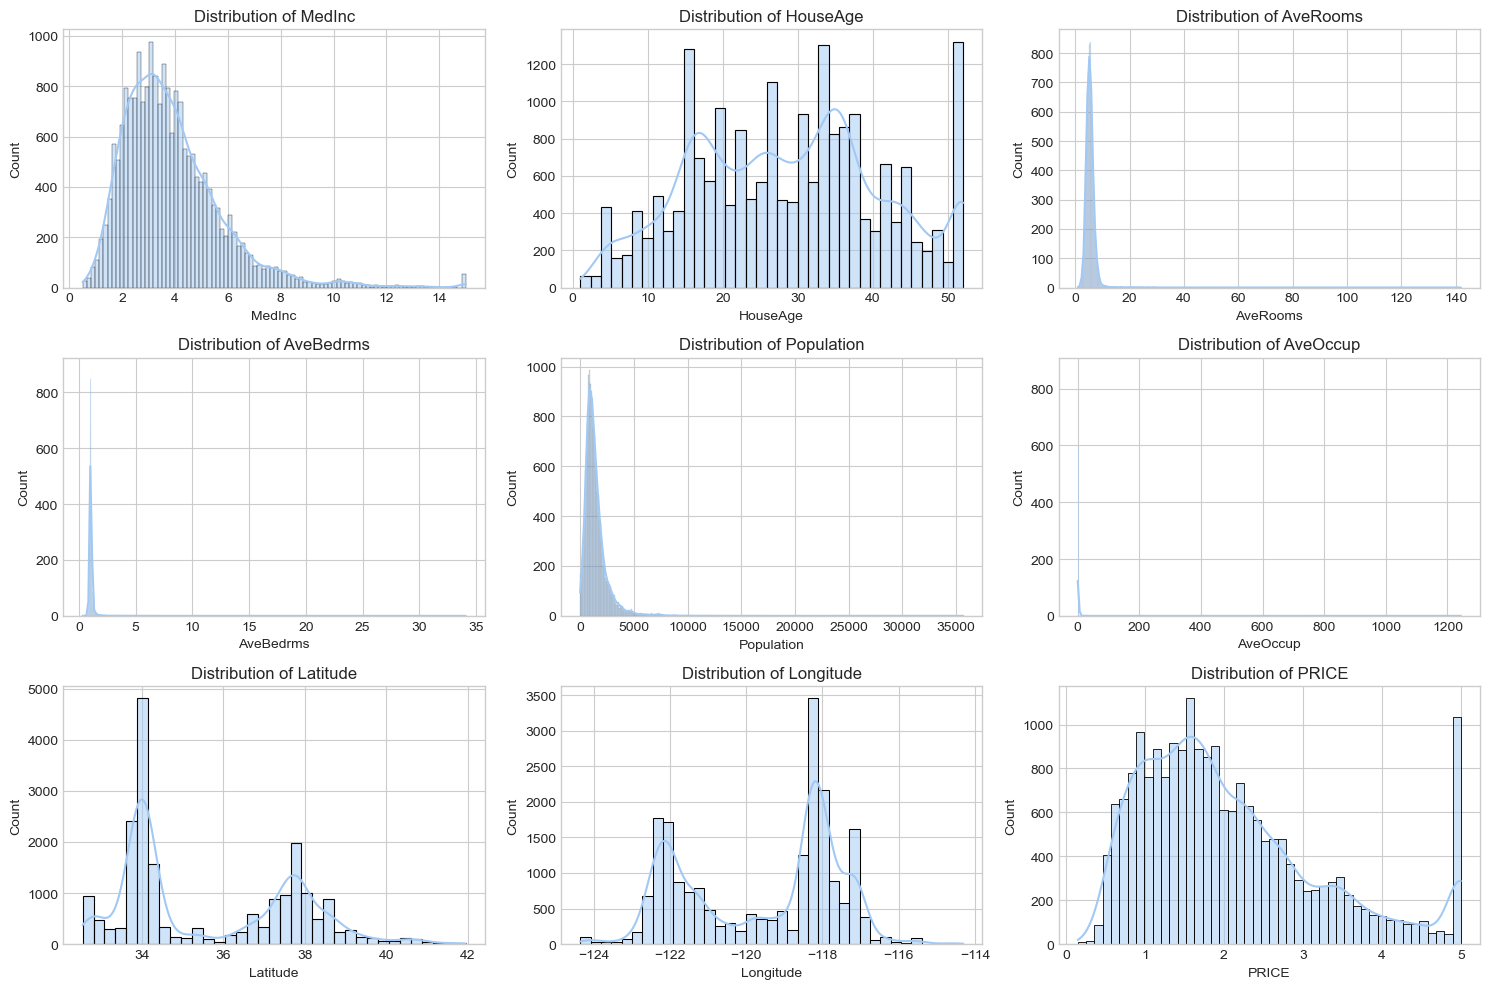

In [24]:
# Set up a figure with multiple subplots
plt.figure(figsize=(15, 10))

# Plot histograms for each feature including the target variable
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

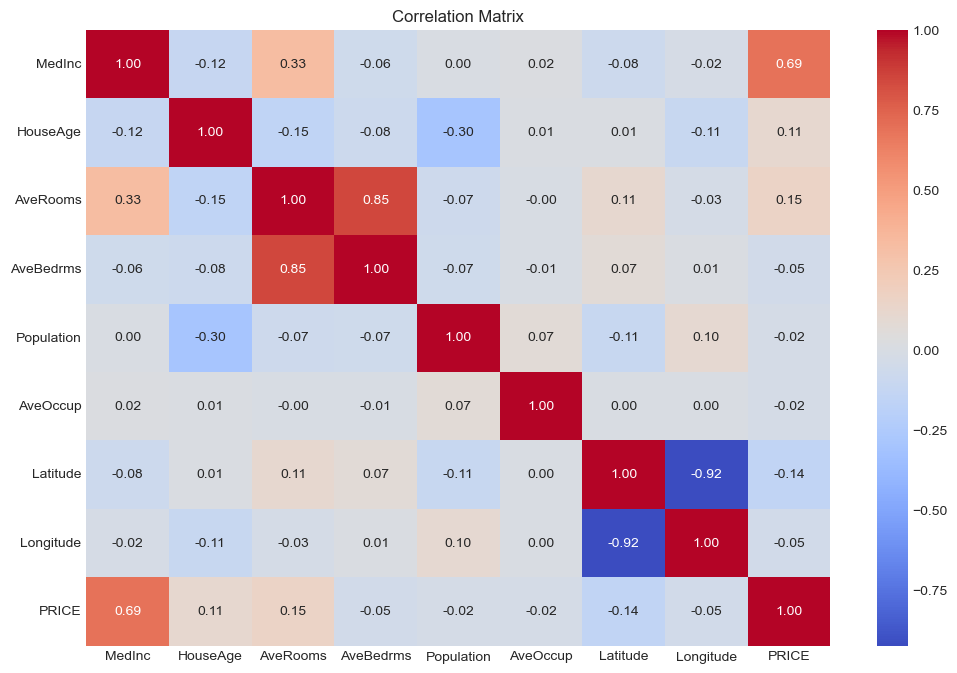

In [25]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [46]:
# Split features and target
X = data.drop('PRICE', axis=1)
y = data['PRICE']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 16512 samples
Testing set size: 4128 samples


In [52]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

print("Features have been scaled!")

Features have been scaled!


Simple Linear Regression Results (using only MedInc):
Coefficient: 0.4193
Intercept: 0.4446
Mean Squared Error: 0.7091
R² Score: 0.4589


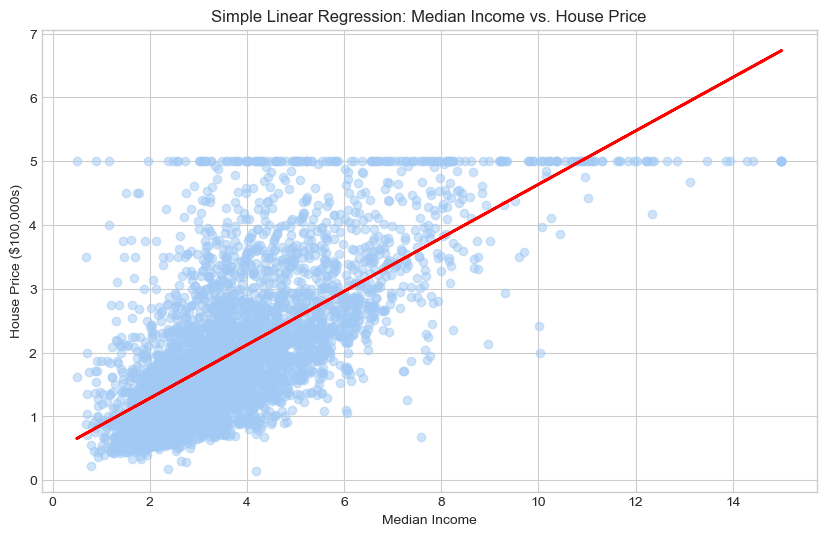

In [78]:
# Choose MedInc (median income) as it has a strong correlation with price
X_train_simple = X_train['MedInc'].values.reshape(-1, 1)
X_test_simple = X_test['MedInc'].values.reshape(-1, 1)

# Create and train the model
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train)

# Make predictions
y_pred_simple = simple_model.predict(X_test_simple)

# Evaluate the model
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print(f"Simple Linear Regression Results (using only MedInc):")
print(f"Coefficient: {simple_model.coef_[0]:.4f}")
print(f"Intercept: {simple_model.intercept_:.4f}")
print(f"Mean Squared Error: {mse_simple:.4f}")
print(f"R² Score: {r2_simple:.4f}")

# Visualize the simple linear regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test, alpha=0.5)
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2)
plt.xlabel('Median Income')
plt.ylabel('House Price ($100,000s)')
plt.title('Simple Linear Regression: Median Income vs. House Price')
plt.show()

In [74]:
# Create and train the model
multiple_model = LinearRegression()
multiple_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_multiple = multiple_model.predict(X_test_scaled)

# Evaluate the model
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print(f"Multiple Linear Regression Results (using all features):")
print(f"Mean Squared Error: {mse_multiple:.4f}")
print(f"R² Score: {r2_multiple:.4f}")

Multiple Linear Regression Results (using all features):
Mean Squared Error: 0.5559
R² Score: 0.5758


Feature coefficients sorted by importance:
      Feature  Coefficient
6    Latitude    -0.896929
7   Longitude    -0.869842
0      MedInc     0.854383
3   AveBedrms     0.339259
2    AveRooms    -0.294410
1    HouseAge     0.122546
5    AveOccup    -0.040829
4  Population    -0.002308


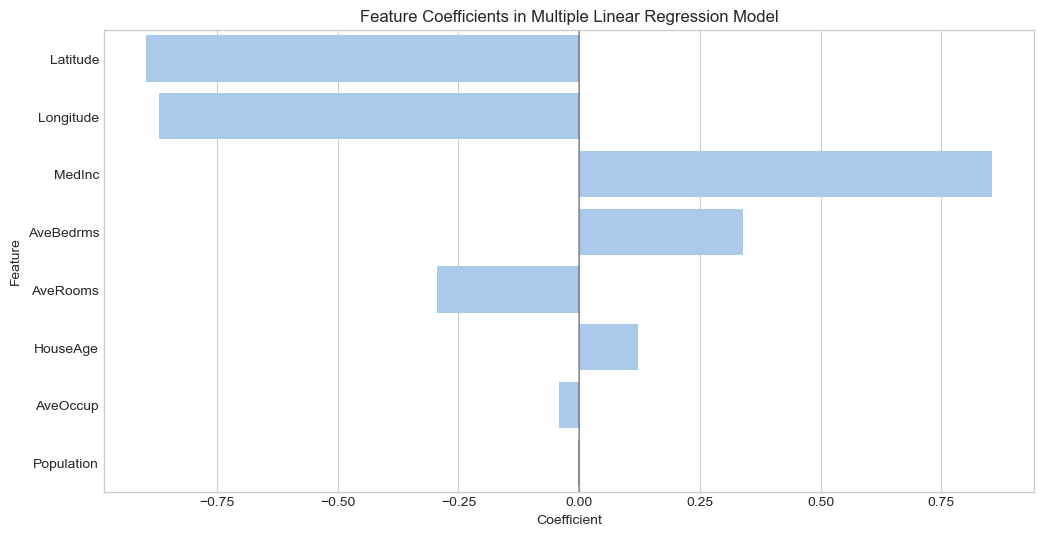

In [76]:
# Create a DataFrame with feature names and their coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': multiple_model.coef_})

# Sort coefficients by absolute value in descending order
coefficients['Absolute_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values('Absolute_Coefficient', ascending=False)

print("Feature coefficients sorted by importance:")
print(coefficients[['Feature', 'Coefficient']])

# Visualize the coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Coefficients in Multiple Linear Regression Model')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.show()

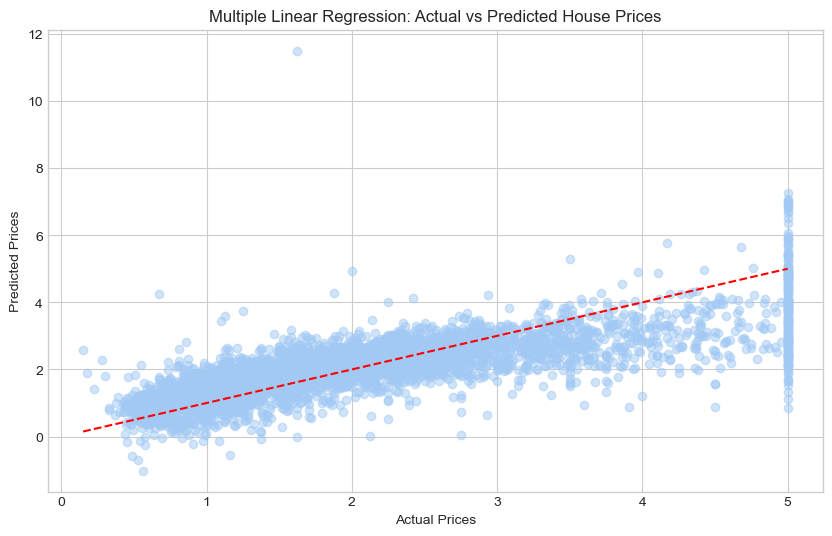

In [80]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multiple, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Multiple Linear Regression: Actual vs Predicted House Prices')
plt.show()

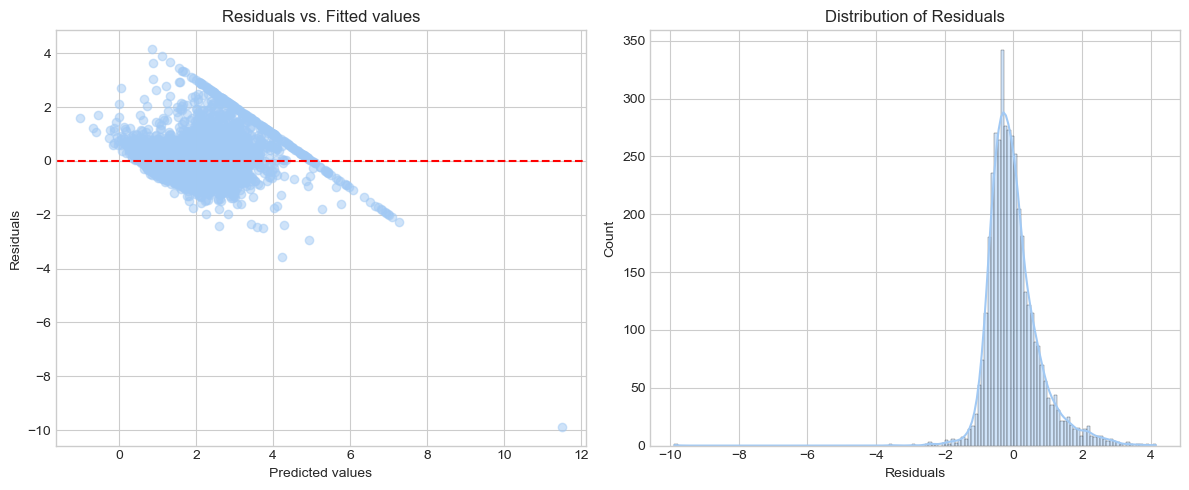

In [82]:
# Calculate residuals
residuals = y_test - y_pred_multiple

# Create residual plots
plt.figure(figsize=(12, 5))

# Residuals vs. Fitted values
plt.subplot(1, 2, 1)
plt.scatter(y_pred_multiple, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted values')

# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

In [84]:
# Create a DataFrame to compare model performance
models = ['Simple Linear Regression', 'Multiple Linear Regression']
mse_scores = [mse_simple, mse_multiple]
r2_scores = [r2_simple, r2_multiple]

comparison = pd.DataFrame({
    'Model': models,
    'MSE': mse_scores,
    'R²': r2_scores})

print("Model Comparison:")
comparison

Model Comparison:


,Model,MSE,R²
0,Simple Linear Regression,0.709116,0.458859
1,Multiple Linear Regression,0.555892,0.575788


In [88]:
def predict_house_price(median_income, median_house_age, avg_rooms, avg_bedrooms, 
                        population, avg_occupants, latitude, longitude):
   
    # Create a DataFrame with the input features
    input_data = pd.DataFrame({
        'MedInc': [median_income],
        'HouseAge': [median_house_age],
        'AveRooms': [avg_rooms],
        'AveBedrms': [avg_bedrooms],
        'Population': [population],
        'AveOccup': [avg_occupants],
        'Latitude': [latitude],
        'Longitude': [longitude]})
    
    # Scale the input data using the same scaler used for training
    input_data_scaled = scaler.transform(input_data)
    
    # Make prediction
    predicted_price = multiple_model.predict(input_data_scaled)[0]
    
    return predicted_price

# Example usage:
# Predict the price of a house with the following characteristics
example_price = predict_house_price(
    median_income=8.5,      # Median income in the block (in tens of thousands)
    median_house_age=15,    # Median house age in the block
    avg_rooms=6,            # Average number of rooms
    avg_bedrooms=2,         # Average number of bedrooms
    population=1500,        # Block population
    avg_occupants=3,        # Average number of occupants
    latitude=37.85,         # Block latitude
    longitude=-122.25       # Block longitude)

print(f"Predicted house price: ${example_price*100000:.2f}")


Predicted house price: $488071.46


In [90]:
print("Project Summary:")
print("-" * 50)
print("1. We used the California Housing dataset to build linear regression models.")
print("2. The simple linear regression model using only Median Income achieved an R² of {:.4f}.".format(r2_simple))
print("3. The multiple linear regression model using all features achieved an R² of {:.4f}.".format(r2_multiple))
print("4. The most important features for predicting house prices were:")
for i in range(3):
    print(f"   - {coefficients.iloc[i]['Feature']}: {coefficients.iloc[i]['Coefficient']:.4f}")
print("\nNext steps could include:")
print("- Trying polynomial features to capture non-linear relationships")
print("- Adding interaction terms between features")
print("- Applying regularization techniques like Ridge or Lasso regression")
print("- Exploring advanced models like Random Forest or Gradient Boosting")

Project Summary:
--------------------------------------------------
1. We used the California Housing dataset to build linear regression models.
2. The simple linear regression model using only Median Income achieved an R² of 0.4589.
3. The multiple linear regression model using all features achieved an R² of 0.5758.
4. The most important features for predicting house prices were:
   - Latitude: -0.8969
   - Longitude: -0.8698
   - MedInc: 0.8544

Next steps could include:
- Trying polynomial features to capture non-linear relationships
- Adding interaction terms between features
- Applying regularization techniques like Ridge or Lasso regression
- Exploring advanced models like Random Forest or Gradient Boosting
